# Avacado Project

**Problem Statement:**
    
Avocado is a fruit consumed by people heavily in the United States. 

Content
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

Date - The date of the observation
AveragePrice - the average price of a single avocado
type - conventional or organic
year - the year
Region - the city or region of the observation
Total Volume - Total number of avocados sold
4046 - Total number of avocados with PLU 4046 sold
4225 - Total number of avocados with PLU 4225 sold
4770 - Total number of avocados with PLU 4770 sold


Inspiration /Label 

The dataset can be seen in two angles to find the region and find the average price .


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("avocado.csv")
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
df.shape

(18249, 14)

We have total 18249 rows and 14 columns in the dataset.

In [4]:
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

We can see AveragePrice is float type and region is object type.

In [5]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [6]:
df.isna().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

<AxesSubplot:>

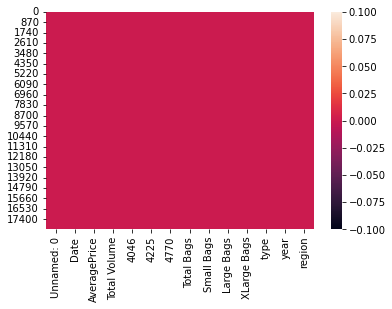

In [7]:
import seaborn as sns

sns.heatmap(df.isnull()) #Looking for null values if any, in heatmap

We can see there is no null value present in any of the columns.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [9]:
#subset the data
subset=df.sample(frac=0.25)

In [10]:
df=subset
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
16736,34,2017-05-07,2.61,9680.55,231.30,5522.61,307.07,3619.57,3168.90,450.67,0.00,organic,2017,RaleighGreensboro
8427,2,2017-12-17,0.85,754023.66,390096.35,161122.14,6208.15,196597.02,94766.70,101820.32,10.00,conventional,2017,WestTexNewMexico
16231,6,2017-11-19,2.07,68466.86,5986.02,16315.77,101.81,46063.26,46015.76,47.50,0.00,organic,2017,NewYork
4742,10,2016-10-16,1.37,247656.68,91951.02,64317.25,17584.71,73803.70,70168.55,3635.15,0.00,conventional,2016,RaleighGreensboro
8655,9,2018-01-21,1.01,349565.06,2991.23,143928.98,137321.51,65323.34,23516.40,1183.72,40623.22,conventional,2018,GrandRapids
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16142,23,2017-07-23,1.43,11898.47,39.23,3771.30,0.00,8087.94,3353.33,4734.61,0.00,organic,2017,Nashville
9431,45,2015-02-15,1.65,1269.74,12.86,123.93,0.00,1132.95,1132.95,0.00,0.00,organic,2015,BuffaloRochester
8318,52,2017-01-01,0.93,578061.29,202816.81,150261.06,71.05,224912.37,87852.78,137059.59,0.00,conventional,2017,Tampa
2286,50,2015-01-11,1.06,527350.82,144349.43,278069.43,18076.48,86855.48,81221.30,5632.65,1.53,conventional,2015,Seattle


# Exploratory Data Analysis

In [11]:
#Let's Check the Unnamed column
df['Unnamed: 0'].unique()

array([34,  2,  6, 10,  9, 16,  3, 11, 14,  8, 35, 51,  4, 15, 50, 30, 20,
       19, 32, 22,  1, 13, 38,  7, 36, 37, 12, 44, 21,  5, 43, 47, 24,  0,
       48, 18, 46, 26, 39, 45, 23, 40, 28, 27, 42, 49, 25, 17, 52, 41, 29,
       31, 33], dtype=int64)

In the dataset, Unnamed column is used as index we are dropping this column.

In [12]:
# Dropping the irrelevant column Unnamed:0
df.drop("Unnamed: 0",axis=1, inplace=True)
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
16736,2017-05-07,2.61,9680.55,231.30,5522.61,307.07,3619.57,3168.90,450.67,0.00,organic,2017,RaleighGreensboro
8427,2017-12-17,0.85,754023.66,390096.35,161122.14,6208.15,196597.02,94766.70,101820.32,10.00,conventional,2017,WestTexNewMexico
16231,2017-11-19,2.07,68466.86,5986.02,16315.77,101.81,46063.26,46015.76,47.50,0.00,organic,2017,NewYork
4742,2016-10-16,1.37,247656.68,91951.02,64317.25,17584.71,73803.70,70168.55,3635.15,0.00,conventional,2016,RaleighGreensboro
8655,2018-01-21,1.01,349565.06,2991.23,143928.98,137321.51,65323.34,23516.40,1183.72,40623.22,conventional,2018,GrandRapids


In [13]:
# Lets Seprate the Date Column into Day, Month, Year to avoid duplication we will also drop Column Date and year present in the dataset
df['Year'],df['Month'],df['Day']=df['Date'].str.split('-').str
df.drop(columns=['year'],inplace=True)
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month,Day
16736,2017-05-07,2.61,9680.55,231.30,5522.61,307.07,3619.57,3168.90,450.67,0.00,organic,RaleighGreensboro,2017,05,07
8427,2017-12-17,0.85,754023.66,390096.35,161122.14,6208.15,196597.02,94766.70,101820.32,10.00,conventional,WestTexNewMexico,2017,12,17
16231,2017-11-19,2.07,68466.86,5986.02,16315.77,101.81,46063.26,46015.76,47.50,0.00,organic,NewYork,2017,11,19
4742,2016-10-16,1.37,247656.68,91951.02,64317.25,17584.71,73803.70,70168.55,3635.15,0.00,conventional,RaleighGreensboro,2016,10,16
8655,2018-01-21,1.01,349565.06,2991.23,143928.98,137321.51,65323.34,23516.40,1183.72,40623.22,conventional,GrandRapids,2018,01,21


Total number of Regions are =  54


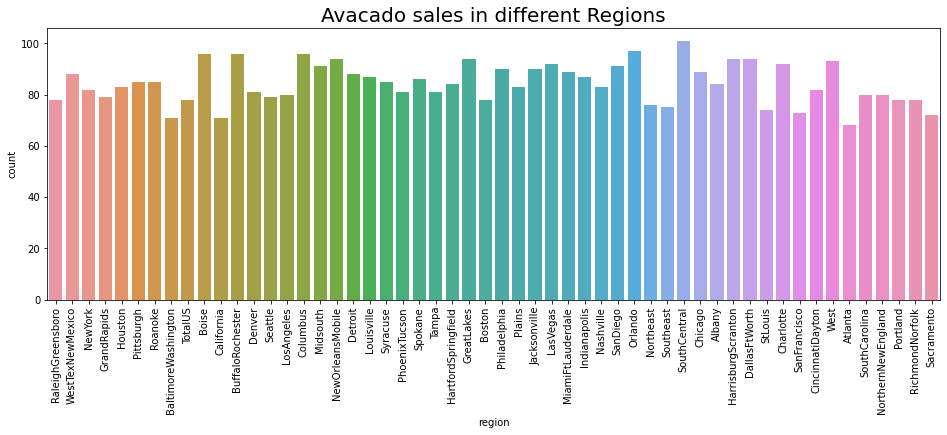

In [14]:
import matplotlib.pyplot as plt
print("Total number of Regions are = ",len(df['region'].unique()))
plt.figure(figsize = (16,5))
ax = sns.countplot(x="region", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title("Avacado sales in different Regions", fontsize = 20)
plt.show()

All the regions have got same quantity, only WestTexNewMexico is little less than others.

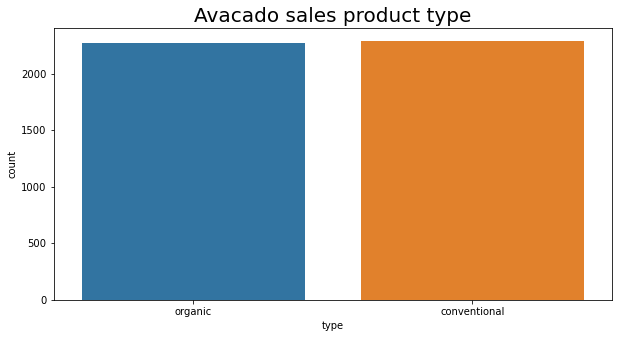

In [15]:
plt.figure(figsize = (10,5))
ax = sns.countplot(x="type", data=df)
plt.title("Avacado sales product type", fontsize = 20)
plt.show()

Here we can see that two types conventional and organic.

<AxesSubplot:xlabel='Year', ylabel='count'>

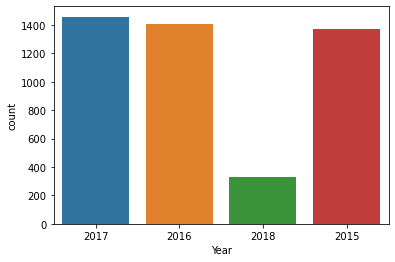

In [16]:
sns.countplot(x='Year', data=df)

Here we can see that there is almost same quantity sold in the year 2015 till 2017, but very less in 2018.

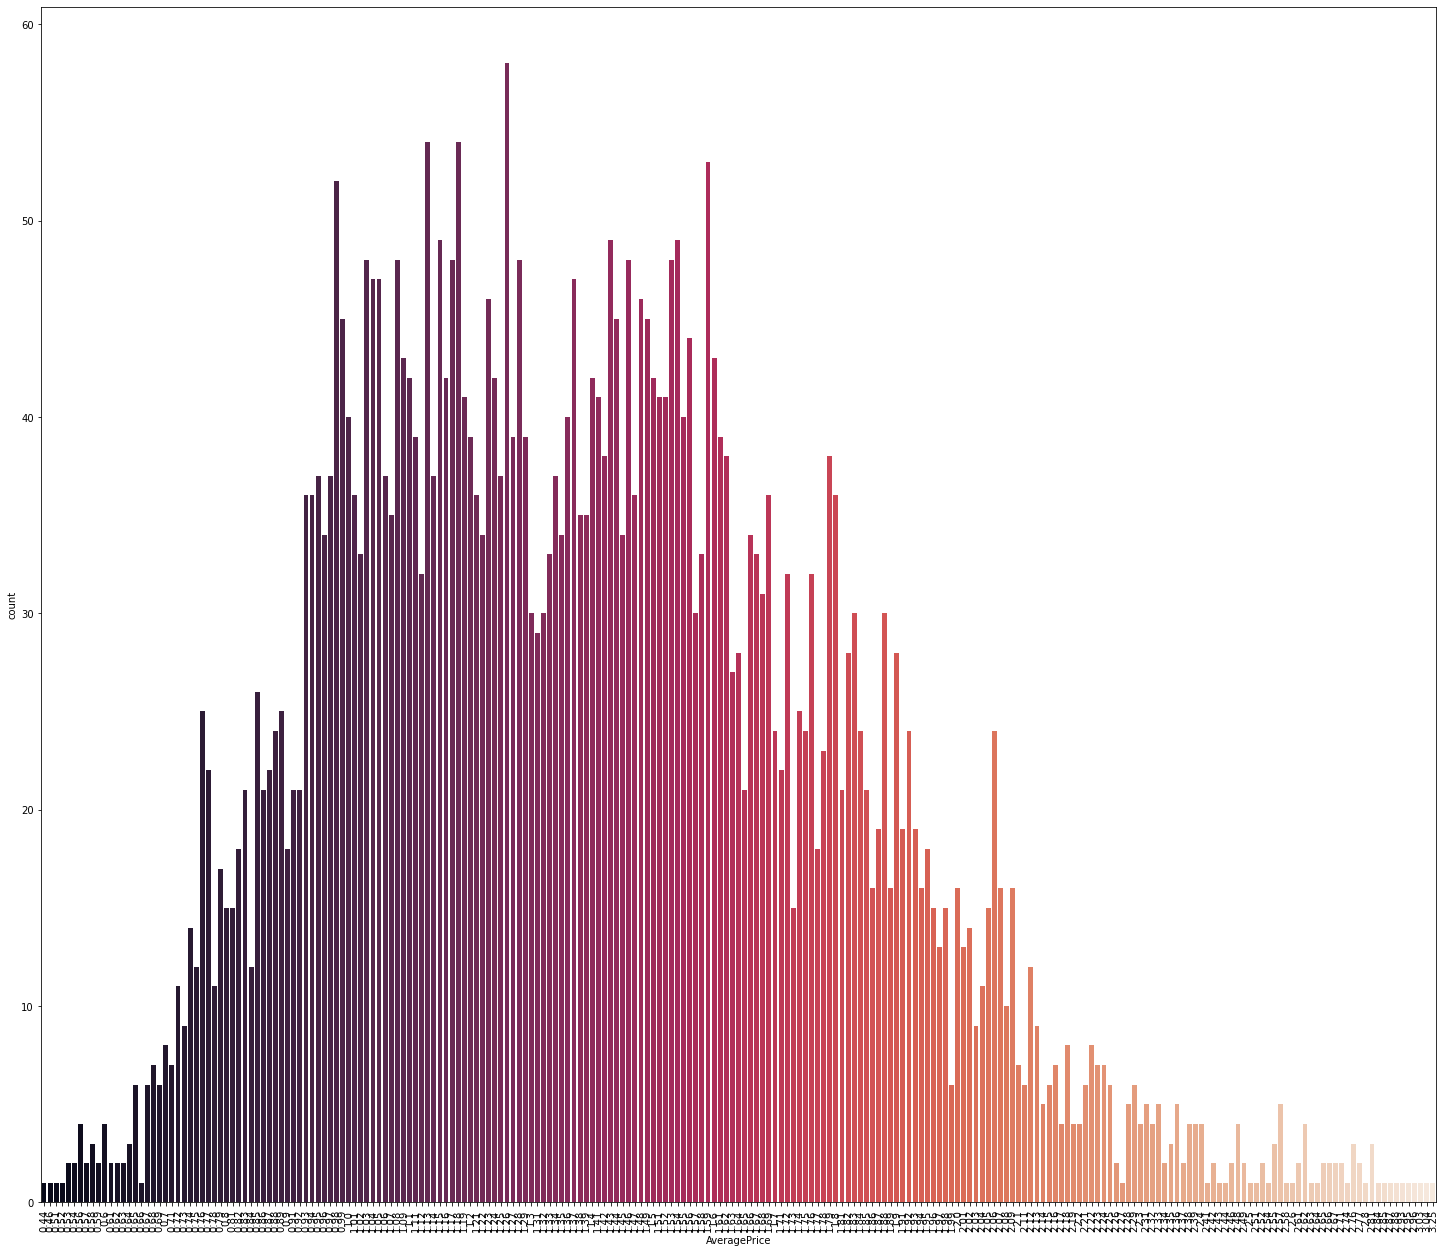

In [17]:
plt.figure(figsize=(25,22))
sns.countplot(df["AveragePrice"],palette="rocket");
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='AveragePrice', ylabel='Total Volume'>

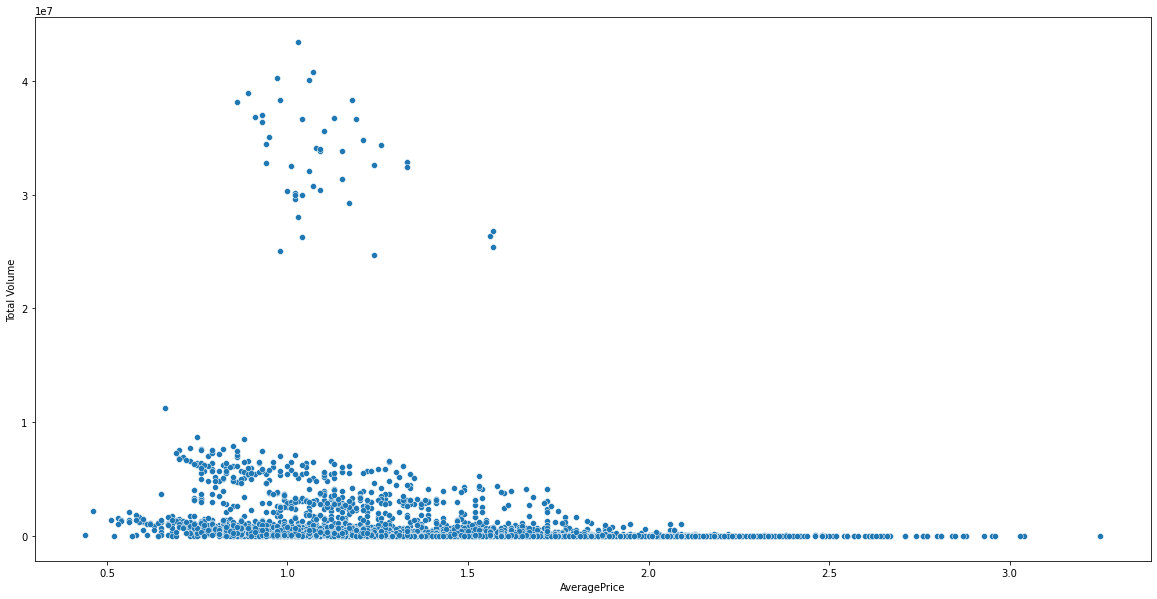

In [18]:
plt.figure(figsize = (20,10))
sns.scatterplot(x = 'AveragePrice', y = 'Total Volume', data = df)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4562 entries, 16736 to 4514
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          4562 non-null   object 
 1   AveragePrice  4562 non-null   float64
 2   Total Volume  4562 non-null   float64
 3   4046          4562 non-null   float64
 4   4225          4562 non-null   float64
 5   4770          4562 non-null   float64
 6   Total Bags    4562 non-null   float64
 7   Small Bags    4562 non-null   float64
 8   Large Bags    4562 non-null   float64
 9   XLarge Bags   4562 non-null   float64
 10  type          4562 non-null   object 
 11  region        4562 non-null   object 
 12  Year          4562 non-null   object 
 13  Month         4562 non-null   object 
 14  Day           4562 non-null   object 
dtypes: float64(9), object(6)
memory usage: 570.2+ KB


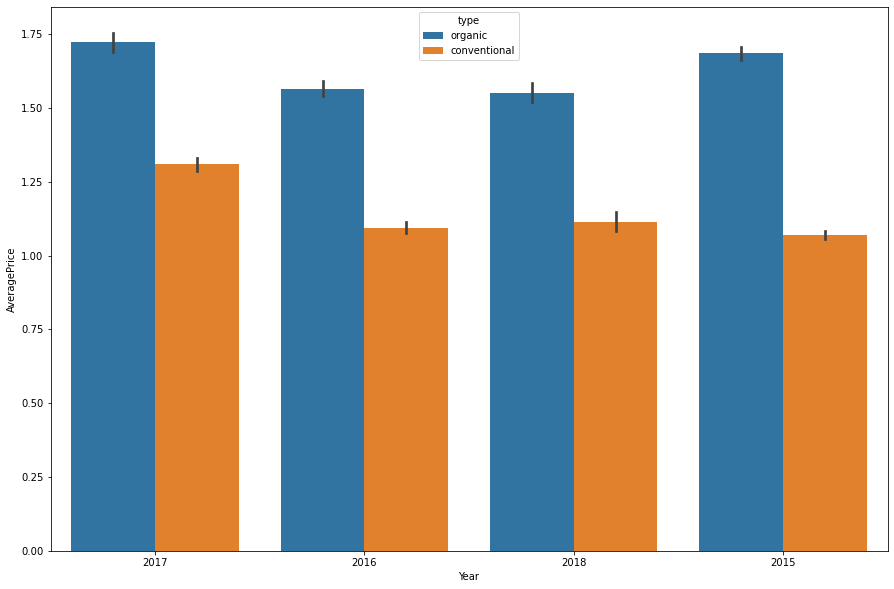

In [20]:
# Lets check Average Price Yearwise.
plt.figure(figsize=(15,10))
sns.barplot(x='Year',y='AveragePrice', hue='type', data=df)
plt.show()

We can see that prices of Conventional Avacado was almost similar whereas in 2017, it was little costlier, while Organic Avacado prices differ a little every year.

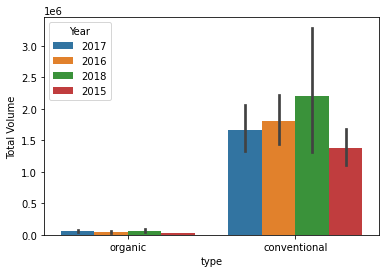

In [21]:
# Lets visualize and compare Total Volumne sold for conventional and organic.
sns.barplot(x='type', y='Total Volume', hue='Year', data= df)
plt.show()

Here we can see huge difference between Total Volume of Conventional farming and organic farming.

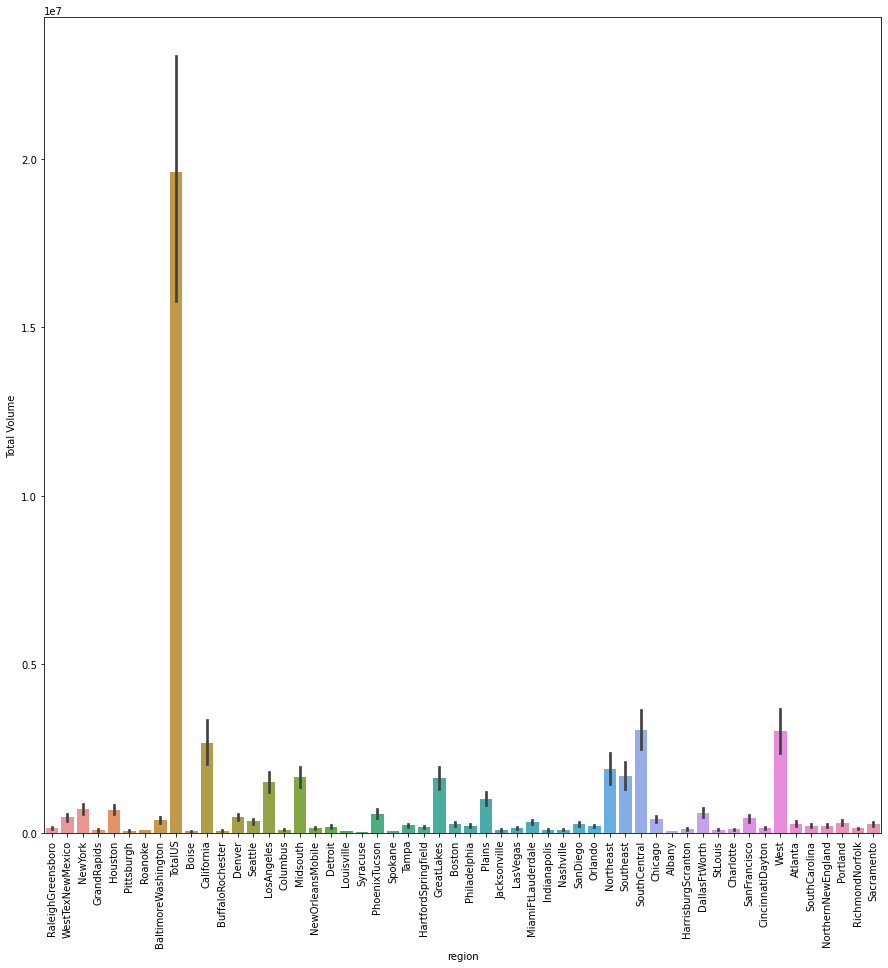

In [22]:
# Lets visualize Total Volume Regionwise.
plt.figure(figsize=(15,15))
sns.barplot(x='region', y='Total Volume', data=df)
plt.xticks(rotation=90)
plt.show()

Here we can see total volume across regions.

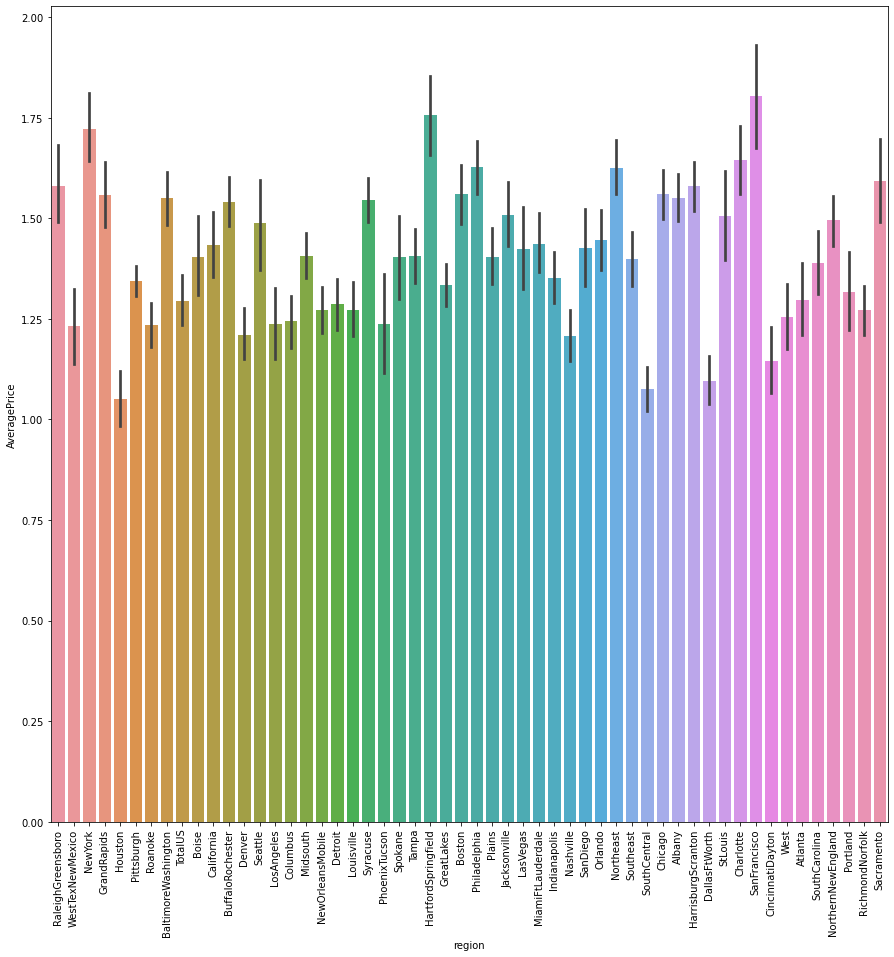

In [23]:
# Lets visualize Total Volume Regionwise.
plt.figure(figsize=(15,15))
sns.barplot(x='region', y='AveragePrice', data=df)
plt.xticks(rotation=90)
plt.show()

Here we can see price varies in different regions.

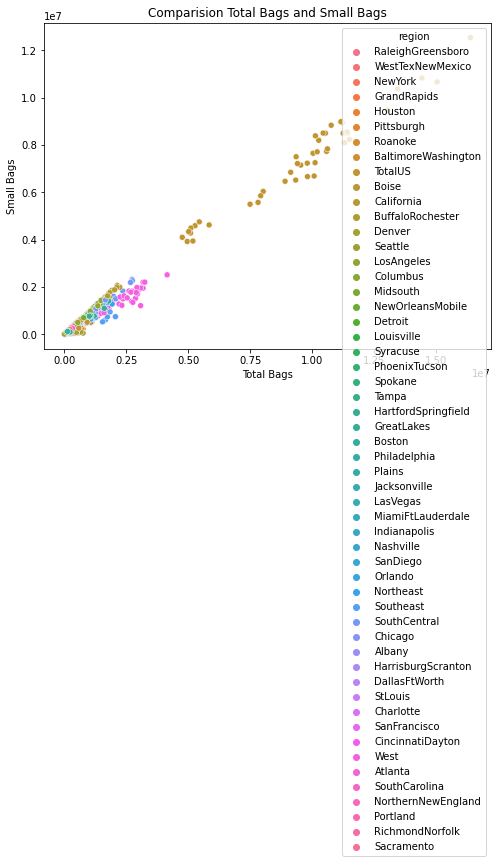

In [24]:
#Comparision between features using scatter plot
plt.figure(figsize=[8,6])
plt.title('Comparision Total Bags and Small Bags')
sns.scatterplot(df['Total Bags'],df['Small Bags'],hue=df["region"]);

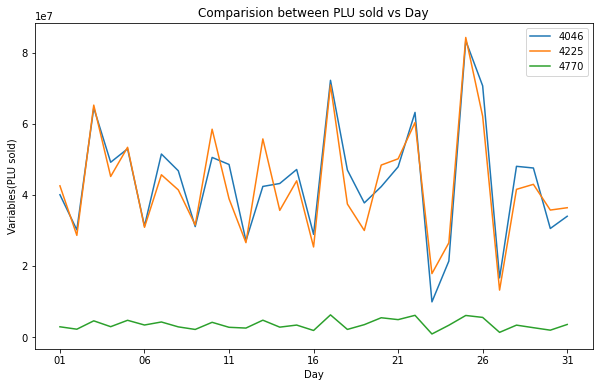

In [25]:
variables = df[['4046', '4225', '4770']].groupby(df.Day).sum()
variables.plot(kind='line', fontsize=10,figsize=(10,6))
plt.title("Comparision between PLU sold vs Day")
plt.xlabel("Day")
plt.ylabel("Variables(PLU sold)")
plt.show()

From the above line plot we can see the total no. of avocados sold in each day with PLU 4046, PLU 4225 and PLU 4770.

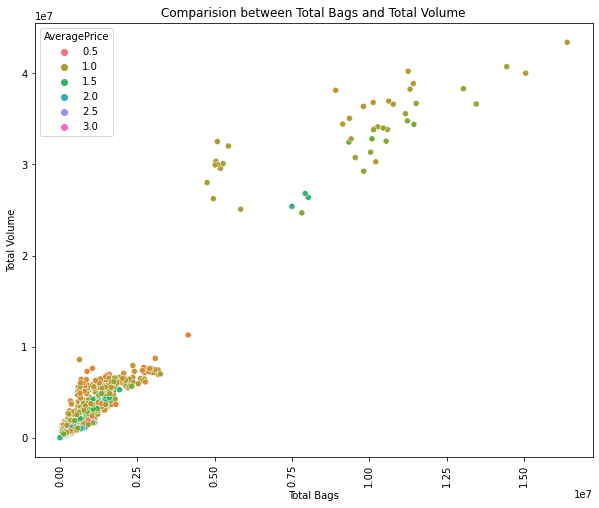

In [26]:
plt.figure(figsize=(10,8))
plt.title("Comparision between Total Bags and Total Volume")
sns.scatterplot(x='Total Bags',y='Total Volume',hue="AveragePrice",data=df,palette="husl")
plt.xticks(rotation=90)
plt.show()

We can observe a linear relationship between total bags sales and total volume.The average price of the avocado also increases with this.

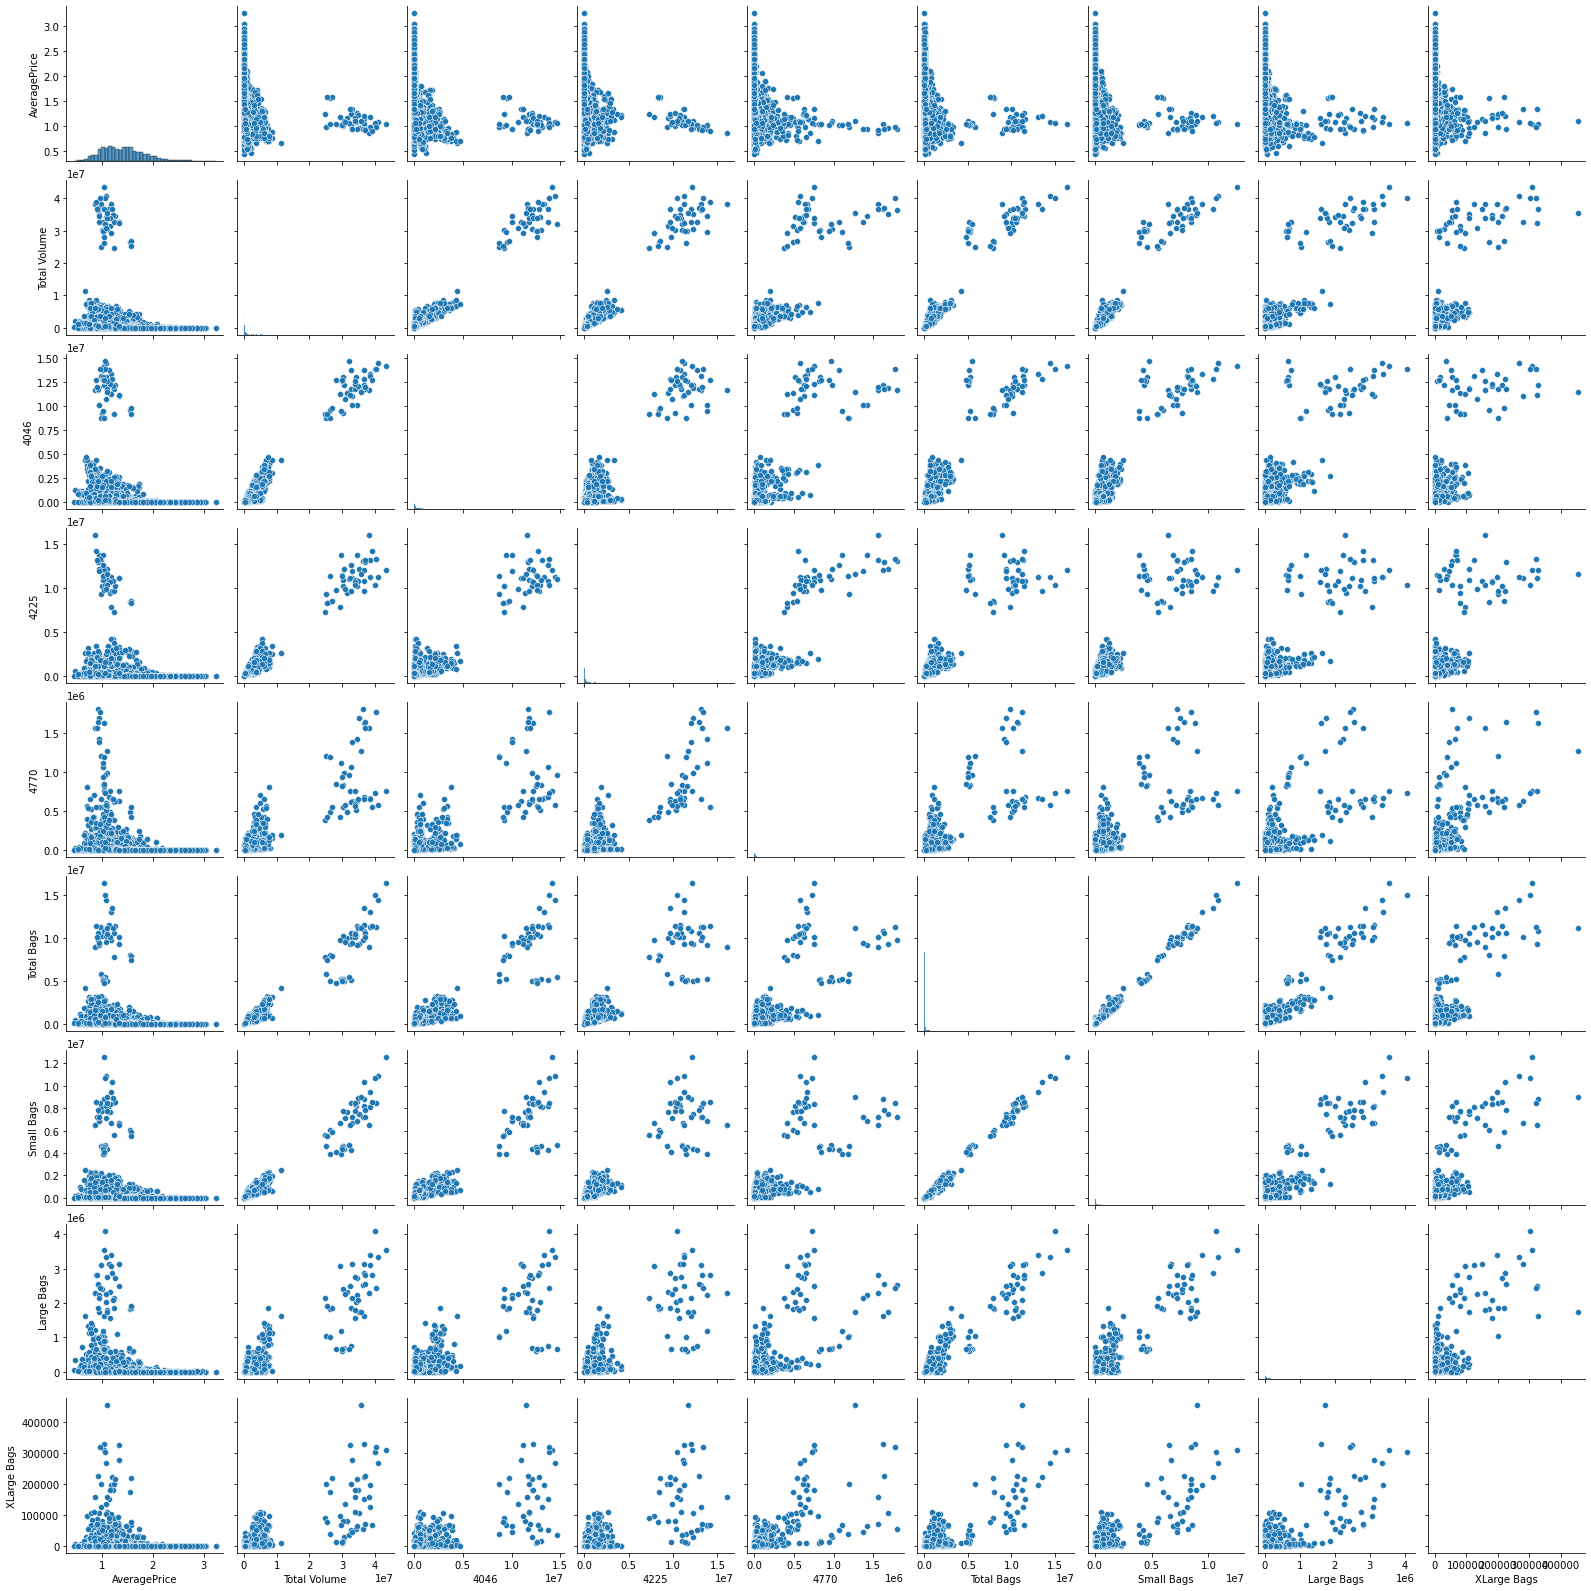

In [27]:
import seaborn as sns
sns.pairplot(df)

In [28]:
# Converting the dtype from object to int and renaming column day to date and deleting day column from the dataset.
df['Year']=df['Year'].astype(int)
df['Month']=df['Month'].astype(int)
df['Date']=df['Day'].astype(int)
df.drop(columns=['Day'], inplace=True)
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month
16736,7,2.61,9680.55,231.30,5522.61,307.07,3619.57,3168.90,450.67,0.00,organic,RaleighGreensboro,2017,5
8427,17,0.85,754023.66,390096.35,161122.14,6208.15,196597.02,94766.70,101820.32,10.00,conventional,WestTexNewMexico,2017,12
16231,19,2.07,68466.86,5986.02,16315.77,101.81,46063.26,46015.76,47.50,0.00,organic,NewYork,2017,11
4742,16,1.37,247656.68,91951.02,64317.25,17584.71,73803.70,70168.55,3635.15,0.00,conventional,RaleighGreensboro,2016,10
8655,21,1.01,349565.06,2991.23,143928.98,137321.51,65323.34,23516.40,1183.72,40623.22,conventional,GrandRapids,2018,1


# Checking Outliers:

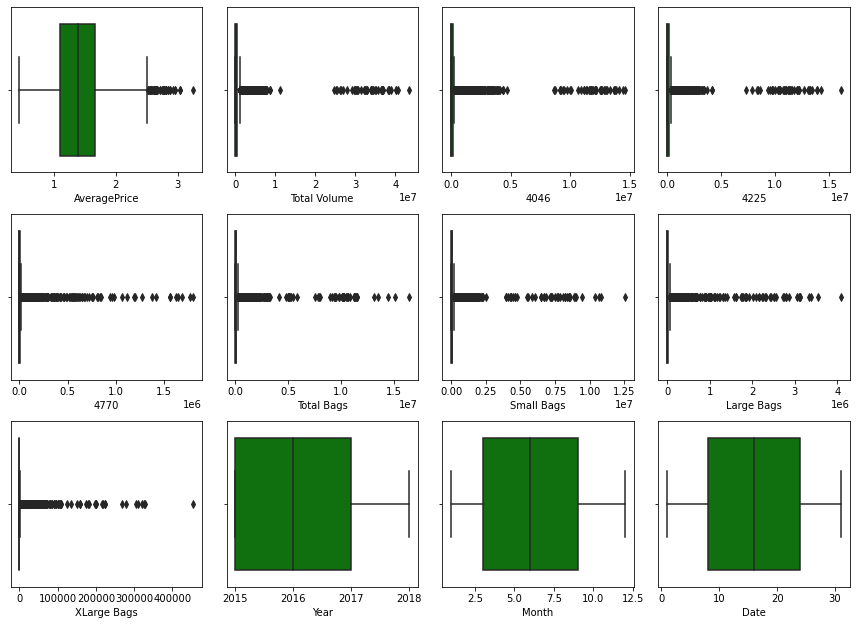

In [29]:
collist=['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'Year','Month', 'Date']
ncol=4
nrows=14
plt.figure(figsize=(3*ncol,10*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='h')
    plt.tight_layout()#fits all graphs in one single format

Outliers are present in all the columns except year, Month and Day. AveragePrice also has outliers, since it is our target variable we would keep it as it is.

In [30]:
# Features containing outliers
Out = df[['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']]

# Using zscore to remove outliers
from scipy.stats import zscore
z=np.abs(zscore(Out))
z

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
16736,0.243609,0.235481,0.241730,0.214784,0.235579,0.234712,0.223626,0.179233
8427,0.029468,0.073253,0.109906,0.160620,0.046691,0.116345,0.184741,0.178726
16231,0.226696,0.230924,0.232586,0.216668,0.194034,0.179343,0.225251,0.179233
4742,0.175145,0.162848,0.191919,0.056200,0.166882,0.148132,0.210798,0.179233
8655,0.145827,0.233296,0.124472,1.042813,0.175183,0.208418,0.220673,1.879608
...,...,...,...,...,...,...,...,...
16142,0.242971,0.235633,0.243214,0.217602,0.231205,0.234474,0.206369,0.179233
9431,0.246029,0.235654,0.246304,0.217602,0.238013,0.237343,0.225442,0.179233
8318,0.080091,0.075054,0.119108,0.216950,0.018975,0.125280,0.326702,0.179233
2286,0.094680,0.121354,0.010828,0.051686,0.154107,0.133849,0.202751,0.179156


In [31]:
# Creating new dataframe
df_new = df[(z<3).all(axis=1)] 
df_new

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month
16736,7,2.61,9680.55,231.30,5522.61,307.07,3619.57,3168.90,450.67,0.00,organic,RaleighGreensboro,2017,5
8427,17,0.85,754023.66,390096.35,161122.14,6208.15,196597.02,94766.70,101820.32,10.00,conventional,WestTexNewMexico,2017,12
16231,19,2.07,68466.86,5986.02,16315.77,101.81,46063.26,46015.76,47.50,0.00,organic,NewYork,2017,11
4742,16,1.37,247656.68,91951.02,64317.25,17584.71,73803.70,70168.55,3635.15,0.00,conventional,RaleighGreensboro,2016,10
8655,21,1.01,349565.06,2991.23,143928.98,137321.51,65323.34,23516.40,1183.72,40623.22,conventional,GrandRapids,2018,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16142,23,1.43,11898.47,39.23,3771.30,0.00,8087.94,3353.33,4734.61,0.00,organic,Nashville,2017,7
9431,15,1.65,1269.74,12.86,123.93,0.00,1132.95,1132.95,0.00,0.00,organic,BuffaloRochester,2015,2
8318,1,0.93,578061.29,202816.81,150261.06,71.05,224912.37,87852.78,137059.59,0.00,conventional,Tampa,2017,1
2286,11,1.06,527350.82,144349.43,278069.43,18076.48,86855.48,81221.30,5632.65,1.53,conventional,Seattle,2015,1


In [32]:
# Shape of original dataset
df.shape

(4562, 14)

In [33]:
# Shape of new dataframe
df_new.shape

(4446, 14)

# Percentage Data Loss:

In [34]:
# Checking the the data loss
data_loss = (18249-17782)/18249*100
data_loss

2.55904433119623

# SKEWNESS:

In [35]:
df_new.describe()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,Year,Month
count,4446.000000,4446.000000,4.446000e+03,4.446000e+03,4.446000e+03,4446.000000,4.446000e+03,4.446000e+03,4446.000000,4446.000000,4446.000000,4446.000000
mean,15.870445,1.414478,4.490596e+05,1.515600e+05,1.586483e+05,11558.598174,1.272907e+05,9.788281e+04,27881.355904,1526.558974,2016.156095,6.195232
std,8.791029,0.403507,9.765449e+05,4.228377e+05,3.770238e+05,35622.856068,2.744626e+05,2.222520e+05,71882.535427,5858.938064,0.939290,3.530696
min,1.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,2015.000000,1.000000
25%,8.000000,1.110000,1.023611e+04,7.579725e+02,2.716310e+03,0.000000,4.679577e+03,2.579155e+03,109.597500,0.000000,2015.000000,3.000000
50%,16.000000,1.390000,9.809185e+04,7.398225e+03,2.630425e+04,149.045000,3.631223e+04,2.319442e+04,2451.450000,0.000000,2016.000000,6.000000
75%,24.000000,1.670000,3.723038e+05,9.861596e+04,1.211435e+05,5259.180000,1.014585e+05,7.662373e+04,19687.707500,78.057500,2017.000000,9.000000
max,31.000000,3.250000,7.275843e+06,4.041490e+06,3.730288e+06,346867.180000,2.730445e+06,2.311921e+06,780038.560000,61880.700000,2018.000000,12.000000


Seems there is skewness in the data.

In [36]:
df_new.skew() #we are checking skewness as we want the data to be normally distributed.

Date           -0.011714
AveragePrice    0.534054
Total Volume    3.758253
4046            4.964554
4225            4.386505
4770            4.985974
Total Bags      4.010047
Small Bags      4.141716
Large Bags      4.989920
XLarge Bags     6.210796
Year            0.198436
Month           0.089600
dtype: float64

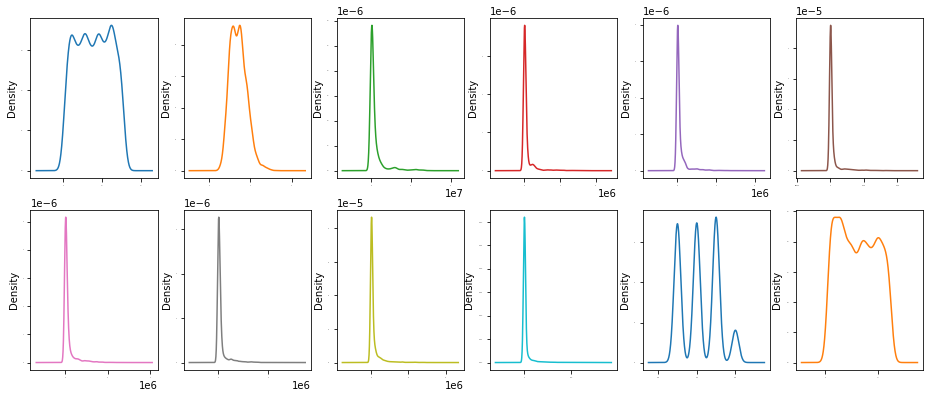

In [37]:
#data distribution of all colomns
df_new.plot(kind='density',subplots=True, layout=(3,6),sharex=False,legend=False,fontsize=1,figsize=(16,10))
plt.show()

# Transforming data to remove skewness

In [38]:
# Removing skewness using yeo-johnson method to get better prediction
features = ['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')


In [39]:
df_new[features] = scaler.fit_transform(df_new[features].values)
df_new[features].head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
16736,-0.911172,-1.040029,-0.496256,0.254946,-0.895652,-0.712954,-0.397553,-0.678800
8427,1.080209,1.318736,0.842010,0.969491,1.008697,0.763546,1.402490,0.760817
16231,-0.032874,-0.126444,-0.107831,-0.015949,0.256537,0.405505,-0.920791,-0.678800
4742,0.558638,0.780301,0.438627,1.208274,0.492796,0.611402,0.194996,-0.678800
8655,0.719157,-0.335551,0.790718,1.666719,0.430893,0.095620,-0.137225,1.710910


In [40]:
# Checking skewness after using yeo=johnson ethod
df_new.skew()

Date           -0.011714
AveragePrice    0.534054
Total Volume   -0.010781
4046           -0.043010
4225           -0.045903
4770            0.034682
Total Bags     -0.023492
Small Bags     -0.024726
Large Bags     -0.113155
XLarge Bags     0.855881
Year            0.198436
Month           0.089600
dtype: float64

In [41]:
# Removing skewness of XLarge Bags using log transformation as it is still present in the data
df_new["XLarge Bags"] = np.log1p(df_new["XLarge Bags"])
df_new.skew()

Date           -0.011714
AveragePrice    0.534054
Total Volume   -0.010781
4046           -0.043010
4225           -0.045903
4770            0.034682
Total Bags     -0.023492
Small Bags     -0.024726
Large Bags     -0.113155
XLarge Bags     0.780668
Year            0.198436
Month           0.089600
dtype: float64

Now Skewness is removed for all columns.

# Encoding

In [42]:
categorical_col = ["type","region"]

from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df_new[categorical_col]= df_new[categorical_col].apply(LE.fit_transform)

df_new[categorical_col]

,type,region
16736,1,37
8427,0,53
16231,1,28
4742,0,37
8655,0,14
...,...,...
16142,1,26
9431,1,5
8318,0,50
2286,0,43


In [43]:
#checking correlation
df_new.describe()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month
count,4446.000000,4446.000000,4.446000e+03,4.446000e+03,4.446000e+03,4.446000e+03,4.446000e+03,4.446000e+03,4.446000e+03,4446.000000,4446.000000,4446.000000,4446.000000,4446.000000
mean,15.870445,1.414478,-6.877090e-17,1.390276e-16,-1.656595e-16,3.389851e-17,3.101183e-16,9.668879e-17,-2.093093e-16,-0.485154,0.511471,25.959964,2016.156095,6.195232
std,8.791029,0.403507,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00,0.942566,0.499925,15.291784,0.939290,3.530696
min,1.000000,0.440000,-2.930525e+00,-2.245538e+00,-2.582592e+00,-1.220497e+00,-3.504461e+00,-2.712864e+00,-1.616515e+00,-1.135693,0.000000,0.000000,2015.000000,1.000000
25%,8.000000,1.110000,-8.864756e-01,-7.261126e-01,-7.318186e-01,-1.220497e+00,-7.881400e-01,-7.870425e-01,-7.394825e-01,-1.135693,0.000000,13.000000,2015.000000,3.000000
50%,16.000000,1.390000,1.313953e-01,-6.096826e-02,7.520012e-02,7.797585e-02,1.401621e-01,8.947515e-02,7.452532e-02,-1.135693,1.000000,26.000000,2016.000000,6.000000
75%,24.000000,1.670000,7.485984e-01,8.053876e-01,7.133306e-01,9.310331e-01,6.566236e-01,6.554758e-01,7.623635e-01,0.824035,1.000000,39.000000,2017.000000,9.000000
max,31.000000,3.250000,2.169556e+00,2.286946e+00,2.488533e+00,1.867919e+00,2.576492e+00,2.704271e+00,2.337248e+00,0.999780,1.000000,53.000000,2018.000000,12.000000


In [44]:
#checking correlation
df_new.corr()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month
Date,1.000000,0.047745,-0.022159,-0.009291,-0.026047,-0.007494,-0.023146,-0.012090,-0.024101,-0.000857,0.011651,0.011110,-0.004907,0.015609
AveragePrice,0.047745,1.000000,-0.580524,-0.553990,-0.451698,-0.489413,-0.573888,-0.504470,-0.487090,-0.386901,0.603782,-0.006749,0.090261,0.165381
Total Volume,-0.022159,-0.580524,1.000000,0.893816,0.924656,0.818465,0.943615,0.908442,0.687518,0.632436,-0.802366,0.096146,0.088051,-0.045223
4046,-0.009291,-0.553990,0.893816,1.000000,0.770283,0.743535,0.808847,0.788021,0.608575,0.572811,-0.731612,0.190308,0.007062,-0.044115
4225,-0.026047,-0.451698,0.924656,0.770283,1.000000,0.800069,0.822030,0.786817,0.623349,0.592888,-0.753455,0.057085,0.010218,-0.040934
4770,-0.007494,-0.489413,0.818465,0.743535,0.800069,1.000000,0.754872,0.747328,0.544965,0.621873,-0.787183,0.065874,-0.048664,-0.037902
Total Bags,-0.023146,-0.573888,0.943615,0.808847,0.822030,0.754872,1.000000,0.951831,0.729150,0.610831,-0.726078,0.094345,0.218046,-0.029968
Small Bags,-0.012090,-0.504470,0.908442,0.788021,0.786817,0.747328,0.951831,1.000000,0.568130,0.600422,-0.719511,0.081654,0.191745,-0.026830
Large Bags,-0.024101,-0.487090,0.687518,0.608575,0.623349,0.544965,0.729150,0.568130,1.000000,0.450305,-0.506607,0.093827,0.194102,-0.037526
XLarge Bags,-0.000857,-0.386901,0.632436,0.572811,0.592888,0.621873,0.610831,0.600422,0.450305,1.000000,-0.676600,-0.008825,0.151760,0.000412


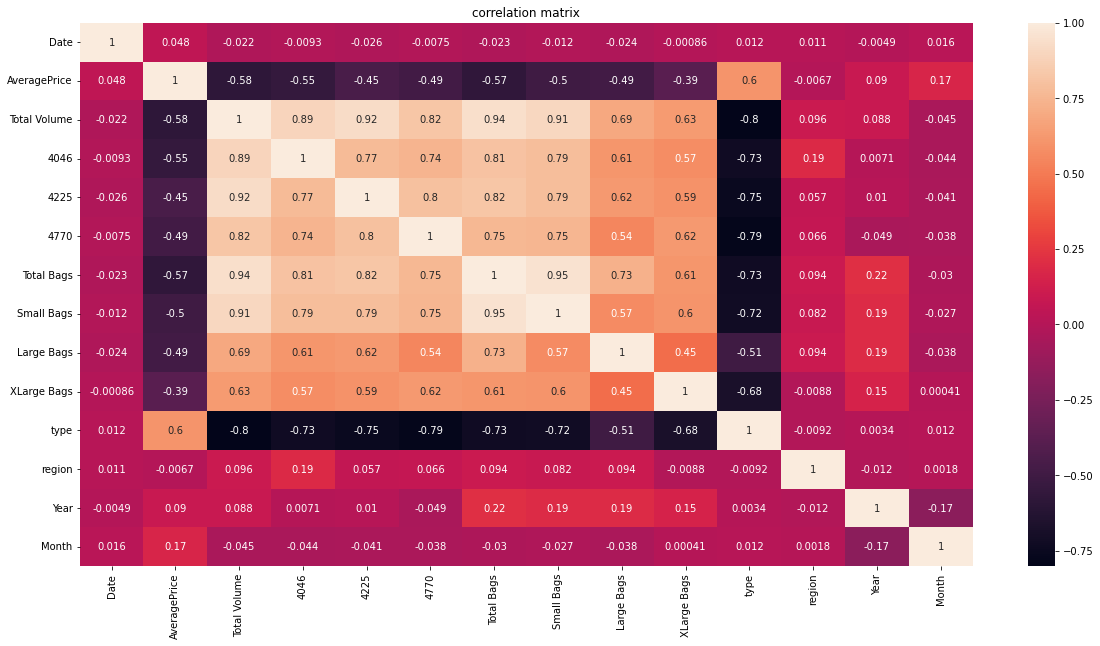

In [45]:
plt.figure(figsize=[20,10])
sns.heatmap(df_new.corr(),annot=True)
plt.title('correlation matrix')
plt.show()

This heatmap contains both positive and negative correlation.

* Total Bags and Small Bags are highly correlated with each other.
* Total Volume and Small Bags are highly correlated with each other.
* Total Volume and Total Bags are highly correlated with each other.
* Total Volume and 4225,4046 are highly correlated with each other.

In [46]:
cor=df_new.corr()
cor['AveragePrice']

Date            0.047745
AveragePrice    1.000000
Total Volume   -0.580524
4046           -0.553990
4225           -0.451698
4770           -0.489413
Total Bags     -0.573888
Small Bags     -0.504470
Large Bags     -0.487090
XLarge Bags    -0.386901
type            0.603782
region         -0.006749
Year            0.090261
Month           0.165381
Name: AveragePrice, dtype: float64

In [47]:
pd.DataFrame(df_new).skew()

Date           -0.011714
AveragePrice    0.534054
Total Volume   -0.010781
4046           -0.043010
4225           -0.045903
4770            0.034682
Total Bags     -0.023492
Small Bags     -0.024726
Large Bags     -0.113155
XLarge Bags     0.780668
type           -0.045912
region          0.048066
Year            0.198436
Month           0.089600
dtype: float64

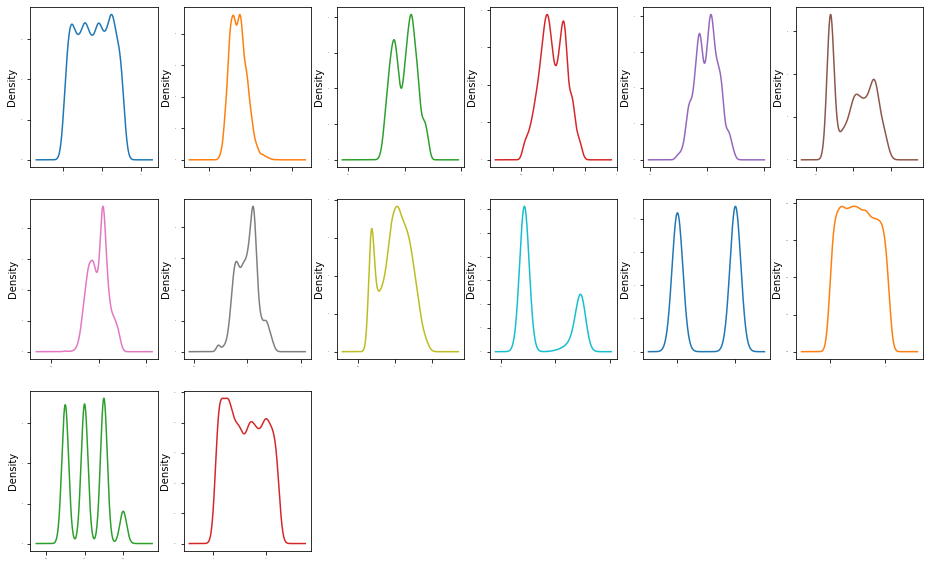

In [48]:
#data distribution of all colomns after transformation
pd.DataFrame(df_new).plot(kind='density',subplots=True, layout=(3,6),sharex=False,legend=False,fontsize=1,figsize=(16,10))
plt.show()

# Splitting independent variable and target variable (Average Price)

In [49]:
x = df_new.drop("AveragePrice", axis=1)
y = df_new["AveragePrice"]
x

,Date,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month
16736,7,-0.911172,-1.040029,-0.496256,0.254946,-0.895652,-0.712954,-0.397553,-1.135693,1,37,2017,5
8427,17,1.080209,1.318736,0.842010,0.969491,1.008697,0.763546,1.402490,0.565778,0,53,2017,12
16231,19,-0.032874,-0.126444,-0.107831,-0.015949,0.256537,0.405505,-0.920791,-1.135693,1,28,2017,11
4742,16,0.558638,0.780301,0.438627,1.208274,0.492796,0.611402,0.194996,-1.135693,0,37,2016,10
8655,21,0.719157,-0.335551,0.790718,1.666719,0.430893,0.095620,-0.137225,0.997284,0,14,2018,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16142,23,-0.819772,-1.468549,-0.624663,-1.220497,-0.552747,-0.692327,0.278206,-1.135693,1,26,2017,7
9431,15,-1.795960,-1.709268,-1.603820,-1.220497,-1.358994,-1.067928,-1.616515,-1.135693,1,5,2015,2
8318,1,0.954924,1.069662,0.810230,-0.104863,1.082265,0.724753,1.528603,-1.135693,0,50,2017,1
2286,11,0.911754,0.943705,1.097166,1.214540,0.576181,0.684876,0.333975,0.033204,0,43,2015,1


In [50]:
from sklearn.preprocessing import StandardScaler # transforms data such that mean =0 and std dev=1
sc=StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,Date,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month
0,-0.981734,-0.912464,-1.039044,-0.505787,0.258645,-0.897015,-0.716997,-0.430871,-0.694112,0.977315,0.745292,0.898841,-0.231520
1,0.198833,1.082905,1.324810,0.839457,0.969619,1.009909,0.760401,1.446157,1.321815,-1.023211,1.591316,0.898841,1.495878
2,0.411016,-0.044584,-0.134021,-0.121055,-0.011943,0.246513,0.397847,-0.926279,-0.694112,0.977315,0.222729,0.898841,1.277497
3,0.090464,0.551230,0.777986,0.428484,1.206525,0.485093,0.606068,0.156870,-0.694112,-1.023211,0.745292,-0.165437,1.051748
4,0.617753,0.714324,-0.342230,0.786996,1.660614,0.422462,0.086075,-0.176905,1.490625,-1.023211,-0.703666,1.961265,-1.641133
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4441,0.819660,-0.822880,-1.460225,-0.632097,-1.222527,-0.559761,-0.696666,0.242222,-0.694112,0.977315,0.100371,0.898841,0.319466
4442,-0.019574,-1.773373,-1.696113,-1.584689,-1.222527,-1.349796,-1.065901,-1.562262,-0.694112,0.977315,-1.450225,-1.231596,-1.225481
4443,-1.902375,0.954754,1.071472,0.806946,-0.100918,1.085115,0.721014,1.585930,-0.694112,-1.023211,1.439097,0.898841,-1.641133
4444,-0.479396,0.910657,0.943603,1.101220,1.212738,0.569586,0.680552,0.299780,1.004527,-1.023211,1.073071,-1.231596,-1.641133


# Checking VIF for Multicollinearity:

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def vif_calc():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(pd.DataFrame(x).values,i) for i in range(pd.DataFrame(x).shape[1])]
    vif["features"]=pd.DataFrame(x).columns
    print(vif)
    
vif_calc()    

    VIF Factor      features
0     1.002776          Date
1    59.020226  Total Volume
2     7.766000          4046
3    11.929147          4225
4     3.974759          4770
5    39.096202    Total Bags
6    18.161315    Small Bags
7     3.648860    Large Bags
8     2.070662   XLarge Bags
9     3.858408          type
10    1.099369        region
11    1.381174          Year
12    1.061155         Month


The VIF value is greater than 10 in Total Volume, 4225, Total Bags and Small Bags.We will remove the column Total Volume as it is highly correlated with  Total Bags.

In [52]:
# Dropping the feature Total Volume
x.drop("Total Volume",axis=1, inplace=True)

In [53]:
vif_calc()

    VIF Factor     features
0     1.002762         Date
1     3.983126         4046
2     4.470399         4225
3     3.965396         4770
4    27.179963   Total Bags
5    18.157414   Small Bags
6     3.604864   Large Bags
7     2.060917  XLarge Bags
8     3.636725         type
9     1.092173       region
10    1.376382         Year
11    1.057183        Month


We still have multicolinearity issue in the dataset, we are dropping Total Bags as it is highly correlated with Small Bags.

In [54]:
# Dropping the feature Total Bags
x.drop("Total Bags",axis=1, inplace=True)

In [144]:
vif_calc()

    VIF Factor      features
0     1.005201          Date
1     2.077043  AveragePrice
2     3.784148          4046
3     4.536692          4225
4     3.979806          4770
5     4.255610    Small Bags
6     2.126661    Large Bags
7     2.056491   XLarge Bags
8     4.142825          type
9     1.453202          Year
10    1.137466         Month


As all the vif values are less than 10, we can say there is no more multicolinearity issue in the dataset.

Let's start with model building -

# Finding Best Random State:

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


maxAccu=0 #max accuracy
maxRS=0   #best random state value for which max accuracy is achieved

for i in range(1, 1000):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=i)
    lm=LinearRegression()
    lm.fit(x_train, y_train)
    pred = lm.predict(x_test)
    r2 = r2_score(y_test, pred)
    
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i

print("Best R2 score is", maxAccu,"at Random State",maxRS)
print('At random state', maxRS,'lm training score is: ', round(lm.score(x_train, y_train),4))
print('At random state', maxRS,'lm testing score is: ', round(lm.score(x_test, y_test),4))

Best R2 score is 0.5578156506417778 at Random State 336
At random state 336 lm training score is:  0.5126
At random state 336 lm testing score is:  0.5109


# Different Models:

In [60]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=336)

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

LR_model= LinearRegression()
RD_model= Ridge()
LS_model= Lasso()
DT_model= DecisionTreeRegressor()
SV_model= SVR()
KNR_model= KNeighborsRegressor()
RFR_model= RandomForestRegressor()



model=[LR_model,RD_model,LS_model,DT_model,SV_model,KNR_model,RFR_model]

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
for m in model:
    m.fit(x_train,y_train)
    print('mean_absolute_error of ',m ,'model', mean_absolute_error(y_test,m.predict(x_test)))
    print('mean_square_error of',m,'model' , mean_squared_error(y_test,m.predict(x_test)))
    print('R2 Score of',m,'model', r2_score(y_test,m.predict(x_test) )*100)
    print("cross Validation score of ",m ," is ",cross_val_score(m,x,y,cv=5, scoring='neg_mean_squared_error').mean())
    print('\n\n')

mean_absolute_error of  LinearRegression() model 0.20617697489471526
mean_square_error of LinearRegression() model 0.06938700083819763
R2 Score of LinearRegression() model 56.287029369675125
cross Validation score of  LinearRegression()  is  -0.07973424385378451



mean_absolute_error of  Ridge() model 0.2061786808143706
mean_square_error of Ridge() model 0.06939003437284369
R2 Score of Ridge() model 56.285118279567634
cross Validation score of  Ridge()  is  -0.07973396449278024



mean_absolute_error of  Lasso() model 0.324507513807965
mean_square_error of Lasso() model 0.1589481245819772
R2 Score of Lasso() model -0.1353944926850703
cross Validation score of  Lasso()  is  -0.16285163849971954



mean_absolute_error of  DecisionTreeRegressor() model 0.18240449438202247
mean_square_error of DecisionTreeRegressor() model 0.07068157303370787
R2 Score of DecisionTreeRegressor() model 55.47146455670483
cross Validation score of  DecisionTreeRegressor()  is  -0.07605472481389264



mean_abs

RandomForestRegressor is giving the best result here.

# Hyperparameter Tuning:

In [62]:
from sklearn.model_selection import GridSearchCV
model=RandomForestRegressor()
param={'n_estimators':[10,30,50,70,100],'criterion':['mse','mae'],'min_samples_split':[1,2,3,4,5],'min_samples_leaf':[1,2,3,4,5]}
grid=GridSearchCV(estimator=model,param_grid=param,cv=5)
grid.fit(x_train,y_train)

print(grid)
print(grid.best_score_)
print(grid.best_estimator_.criterion)
print(grid.best_params_)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [1, 2, 3, 4, 5],
                         'n_estimators': [10, 30, 50, 70, 100]})
0.7716358210751217
mse
{'criterion': 'mse', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [66]:
RF=RandomForestRegressor(criterion ='mse', min_samples_leaf=1 , min_samples_split=2 , n_estimators=100 )
RF.fit(x_train,y_train)
predRF=RF.predict(x_test)
R2_Score=r2_score(y_test,predRF)
print("R2 score for the Best Model is:", R2_Score)

R2 score for the Best Model is: 0.8030137022844466


# Saving the best Model:

In [67]:
#saved model using joblib library
import joblib
filename = "Avocado_Price"
joblib.dump(RF, filename)

['Avocado_Price']

In [68]:
import numpy as np
a=np.array(y_test)
df_com=pd.DataFrame({"original":a,"Predicted":predRF},index=range(len(a)))
df_com

,original,Predicted
0,1.49,1.4974
1,2.09,1.9508
2,0.80,0.8719
3,1.47,1.3255
4,1.40,1.3050
...,...,...
885,1.91,1.8514
886,1.92,1.8653
887,0.94,1.0999
888,1.77,1.8720


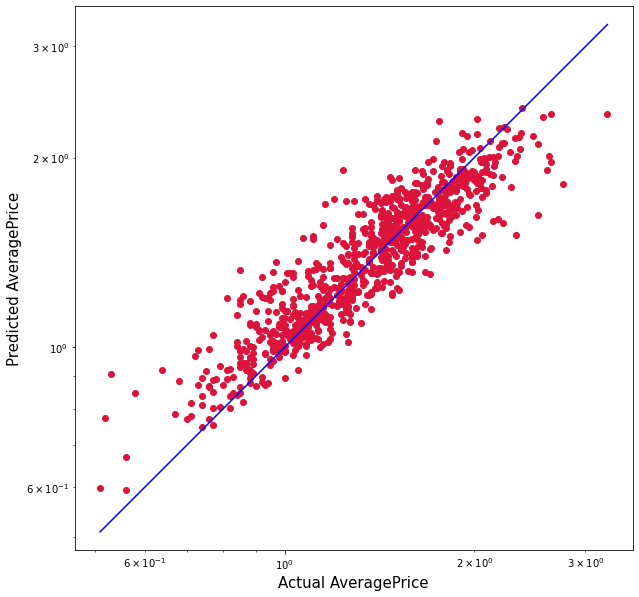

In [81]:
plt.figure(figsize=(10,10))
plt.scatter(a, predRF, c='crimson')
plt.yscale('log')
plt.xscale('log')
p1 = max(max(predRF), max(a))
p2 = min(min(predRF), min(a))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual AveragePrice', fontsize=15)
plt.ylabel('Predicted AveragePrice', fontsize=15)
plt.axis('equal')
plt.show()

# Splitting independent variable and target variable (Region):

In [133]:
x = df_new.drop("region", axis=1)
y = df_new["region"]
x

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,Year,Month
16736,7,2.61,-0.911172,-1.040029,-0.496256,0.254946,-0.895652,-0.712954,-0.397553,-1.135693,1,2017,5
8427,17,0.85,1.080209,1.318736,0.842010,0.969491,1.008697,0.763546,1.402490,0.565778,0,2017,12
16231,19,2.07,-0.032874,-0.126444,-0.107831,-0.015949,0.256537,0.405505,-0.920791,-1.135693,1,2017,11
4742,16,1.37,0.558638,0.780301,0.438627,1.208274,0.492796,0.611402,0.194996,-1.135693,0,2016,10
8655,21,1.01,0.719157,-0.335551,0.790718,1.666719,0.430893,0.095620,-0.137225,0.997284,0,2018,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16142,23,1.43,-0.819772,-1.468549,-0.624663,-1.220497,-0.552747,-0.692327,0.278206,-1.135693,1,2017,7
9431,15,1.65,-1.795960,-1.709268,-1.603820,-1.220497,-1.358994,-1.067928,-1.616515,-1.135693,1,2015,2
8318,1,0.93,0.954924,1.069662,0.810230,-0.104863,1.082265,0.724753,1.528603,-1.135693,0,2017,1
2286,11,1.06,0.911754,0.943705,1.097166,1.214540,0.576181,0.684876,0.333975,0.033204,0,2015,1


In [134]:
from sklearn.preprocessing import StandardScaler # transforms data such that mean =0 and std dev=1
sc=StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,Year,Month
0,-0.981734,2.433057,-0.912464,-1.039044,-0.505787,0.258645,-0.897015,-0.716997,-0.430871,-0.694112,0.977315,0.898841,-0.231520
1,0.198833,-1.555127,1.082905,1.324810,0.839457,0.969619,1.009909,0.760401,1.446157,1.321815,-1.023211,0.898841,1.495878
2,0.411016,1.516486,-0.044584,-0.134021,-0.121055,-0.011943,0.246513,0.397847,-0.926279,-0.694112,0.977315,0.898841,1.277497
3,0.090464,-0.012692,0.551230,0.777986,0.428484,1.206525,0.485093,0.606068,0.156870,-0.694112,-1.023211,-0.165437,1.051748
4,0.617753,-1.029779,0.714324,-0.342230,0.786996,1.660614,0.422462,0.086075,-0.176905,1.490625,-1.023211,1.961265,-1.641133
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4441,0.819660,0.138641,-0.822880,-1.460225,-0.632097,-1.222527,-0.559761,-0.696666,0.242222,-0.694112,0.977315,0.898841,0.319466
4442,-0.019574,0.657223,-1.773373,-1.696113,-1.584689,-1.222527,-1.349796,-1.065901,-1.562262,-0.694112,0.977315,-1.231596,-1.225481
4443,-1.902375,-1.285881,0.954754,1.071472,0.806946,-0.100918,1.085115,0.721014,1.585930,-0.694112,-1.023211,0.898841,-1.641133
4444,-0.479396,-0.875884,0.910657,0.943603,1.101220,1.212738,0.569586,0.680552,0.299780,1.004527,-1.023211,-1.231596,-1.641133


# Checking VIF for Multicollinearity:

In [135]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def vif_calc():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(pd.DataFrame(x).values,i) for i in range(pd.DataFrame(x).shape[1])]
    vif["features"]=pd.DataFrame(x).columns
    print(vif)
    
vif_calc()   

    VIF Factor      features
0     1.005345          Date
1     2.335503  AveragePrice
2    59.731897  Total Volume
3     7.359948          4046
4    12.971846          4225
5     3.986986          4770
6    40.492877    Total Bags
7    18.957562    Small Bags
8     3.658212    Large Bags
9     2.064413   XLarge Bags
10    4.327721          type
11    1.534332          Year
12    1.158949         Month


The VIF value is greater than 10 in Total Volume, 4225, Total Bags and Small Bags.We will remove the column Total Volume as it is highly correlated with Total Bags.

In [136]:
# Dropping the feature Total Volume
x.drop("Total Volume",axis=1, inplace=True)

In [137]:
vif_calc()

    VIF Factor      features
0     1.005338          Date
1     2.292572  AveragePrice
2     3.791558          4046
3     4.870877          4225
4     3.980015          4770
5    29.998416    Total Bags
6    18.953262    Small Bags
7     3.608987    Large Bags
8     2.056536   XLarge Bags
9     4.178248          type
10    1.534096          Year
11    1.158522         Month


We still have multicolinearity issue in the dataset, we are dropping Total Bags as it is highly correlated with Small Bags.

In [138]:
# Dropping the feature Total Bags
x.drop("Total Bags",axis=1, inplace=True)

In [145]:
vif_calc()

    VIF Factor      features
0     1.005201          Date
1     2.077043  AveragePrice
2     3.784148          4046
3     4.536692          4225
4     3.979806          4770
5     4.255610    Small Bags
6     2.126661    Large Bags
7     2.056491   XLarge Bags
8     4.142825          type
9     1.453202          Year
10    1.137466         Month


As all the vif values are less than 10, we can say there is no more multicolinearity issue in the dataset.Let's work on models -

# Finding The Best Random State:

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
maxAccu=0
maxRs=0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    predlr=lr.predict(x_test)
    acc=accuracy_score(y_test,predlr)
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i
print("Best Accuracy is ", maxAccu,"on Random_State",maxRs)

Best Accuracy is  0.4797752808988764 on Random_State 30


In [146]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=30)

# Running Different Algorithms:

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

lg=LogisticRegression()
sv=SVC()
rf=RandomForestClassifier()
knn=KNeighborsClassifier()
dtc=DecisionTreeClassifier()

Running all the models and checking their accuracy and cross validation score. The model with least difference between Cross Validation and Accuracy Score is our best model.

In [79]:
model=[lg,sv,rf,knn,dtc]

for m in model:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print('Accuracy score: of',m)
    acc=accuracy_score(y_test,pred)
    print(acc)
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    score=cross_val_score(m,x,y,cv=5)
    crossval=score.mean()
    print("Cross Validation Score:",crossval)
    print("Difference Between Accuracy Score and CrossValidation Score:",abs(acc-crossval))
    print('\n')

Accuracy score: of LogisticRegression()
0.4797752808988764
[[ 7  0  0 ...  0  0  0]
 [ 0  2  0 ...  0  0  0]
 [ 0  0  6 ...  0  0  1]
 ...
 [ 0  0  0 ...  6  0  0]
 [ 0  0  0 ...  0 17  0]
 [ 0  0  0 ...  0  0  1]]
              precision    recall  f1-score   support

           0       0.25      0.88      0.39         8
           1       0.20      0.18      0.19        11
           2       0.55      0.35      0.43        17
           3       0.36      0.22      0.27        23
           4       0.67      0.53      0.59        19
           5       0.35      0.29      0.32        21
           6       0.54      1.00      0.70         7
           7       0.38      0.56      0.45        16
           8       0.54      0.88      0.67        17
           9       0.48      0.83      0.61        18
          10       0.71      0.71      0.71        17
          11       0.69      0.80      0.74        25
          12       0.35      0.50      0.41        14
          13       0.17     

Cross Validation Score: 0.8252312281189571
Difference Between Accuracy Score and CrossValidation Score: 0.02533056963385183


Accuracy score: of KNeighborsClassifier()
0.3898876404494382
[[ 7  0  0 ...  0  0  0]
 [ 0  2  0 ...  0  0  0]
 [ 0  0 10 ...  0  0  0]
 ...
 [ 0  0  0 ...  6  0  0]
 [ 0  0  0 ...  0 13  0]
 [ 0  3  0 ...  0  0  3]]
              precision    recall  f1-score   support

           0       0.18      0.88      0.30         8
           1       0.07      0.18      0.10        11
           2       0.36      0.59      0.44        17
           3       0.50      0.52      0.51        23
           4       0.47      0.42      0.44        19
           5       0.33      0.33      0.33        21
           6       0.38      0.43      0.40         7
           7       0.30      0.56      0.39        16
           8       0.46      0.76      0.58        17
           9       0.44      0.67      0.53        18
          10       0.25      0.35      0.29        17
        

Random Forest Classifier is giving best accuracy score.

# Hyper Parameter Tuning:

In [80]:
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()

parameters = {'max_depth': np.arange(15,20), 
              'max_features': ['sqrt','auto', 'log2'], 
              'n_estimators': [98,100,102],
              'criterion' :['gini','entropy','log_loss'] }

grid_rf = GridSearchCV(rf, param_grid = parameters, cv = 5)
grid_rf.fit(x,y)

best_params = grid_rf.best_params_
best_score = grid_rf.best_score_

print(best_params)
print(best_score)

{'criterion': 'entropy', 'max_depth': 17, 'max_features': 'log2', 'n_estimators': 98}
0.8346820692357276


In [89]:
rf1=RandomForestClassifier(max_features ='log2', max_depth= 17,criterion= 'entropy',n_estimators=96)
rf1.fit(x_train,y_train)
predrf1=rf1.predict(x_test)
print('Accuracy score: of',rf1)
acc=accuracy_score(y_test,predrf1)
print(acc)
print(confusion_matrix(y_test,predrf1))
print(classification_report(y_test,predrf1))

Accuracy score: of RandomForestClassifier(criterion='entropy', max_depth=17, max_features='log2',
                       n_estimators=96)
0.8505617977528089
[[ 8  0  0 ...  0  0  0]
 [ 0  8  0 ...  0  0  0]
 [ 0  0 16 ...  0  0  0]
 ...
 [ 0  0  0 ...  6  0  0]
 [ 0  0  0 ...  0 18  0]
 [ 0  0  0 ...  0  0 15]]
              precision    recall  f1-score   support

           0       0.44      1.00      0.62         8
           1       0.73      0.73      0.73        11
           2       0.94      0.94      0.94        17
           3       0.84      0.70      0.76        23
           4       1.00      0.95      0.97        19
           5       0.93      0.67      0.78        21
           6       0.78      1.00      0.88         7
           7       0.84      1.00      0.91        16
           8       1.00      0.94      0.97        17
           9       0.84      0.89      0.86        18
          10       0.83      0.88      0.86        17
          11       0.91      0.80     

# ROC AUC:

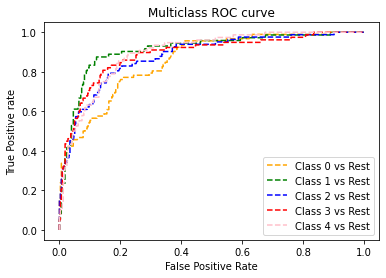

In [140]:
# multi-class classification
from sklearn.datasets import make_classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# generate 2 class dataset
X, Y = make_classification(n_samples=1000, n_classes=5, n_features=20, n_informative=10, random_state=42)

# split into train/test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=42)

# fit model
clf = OneVsRestClassifier(RandomForestClassifier())
clf.fit(X_train, Y_train)
pred = clf.predict(X_test)
pred_prob = clf.predict_proba(X_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 5

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='pink', label='Class 4 vs Rest')


plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);    




In [141]:
roc_auc_score(Y_test,pred_prob,multi_class="ovr")

0.8857598251997139

Here we have chekced the ROC score for 5 classes and the score is also good.

# Model Saving:

In [142]:
import pickle
filename='Avocado_Region.pkl'
pickle.dump(rf1,open(filename,'wb'))

# Conclusion:

In [98]:
import numpy as np
a=np.array(y_test)
df_com=pd.DataFrame({"original":a,"Predicted":predrf1},index=range(len(a)))
df_com.sample(5)

,original,Predicted
717,14,14
682,52,52
588,7,7
56,5,5
366,45,45
